# Learn about Obi-Wan Kenobi

Are you a star wars fan? If not, this exercise will help you learn about one of the most important character of the saga: Obi-Wan Kenobi. We will scrap a wikipedia page and create a word cloud to understand what comes out of the article. 

* To focus on NLP, let's use the following code to retrieve a clean HTML page from a variable. We will see later in the program how it works: 

```
import requests
from bs4 import BeautifulSoup
r = requests.get( "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi" )
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)
```

In [4]:
import requests
from bs4 import BeautifulSoup
r = requests.get( "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi" )
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [p.text for p in soup.find_all("p")]

* We need to install `spacy` modules corresponding to the language specifics (in this case French). So install `en_core_news_sm`. 
  * Feel free to help you with documentation: [English](https://spacy.io/models/fr)

In [10]:
!pip install spacy -q
!python -m spacy download fr_core_news_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


* Since text is in french, import now `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [11]:
import spacy

nlp = spacy.load("fr_core_news_sm")

* For the rest, we need to create a complete corpus of text in a variable. This is a best-practice in the use of spacy. So you will need to create a clean corpus of text. You can do this with the help of : 
  * join()
  * encode() / decode()
  * strip() 

In [62]:
# Join corpus to make one full string
join_corpus = " ".join([text.strip() for text in corpus])
# Decode text 
clean_corpus = join_corpus.strip().encode("utf-8").decode("utf-8")
# Remove punctuation with string 
import string
clean_corpus = clean_corpus.translate(str.maketrans('', '', string.punctuation))
# Visualize first 16 characters
print("{}...".format(clean_corpus[:16]))

Si vous disposez...


* Now load your clean corpus in a `doc` object.

In [63]:
doc = nlp(clean_corpus)

* With the `wordcloud` library, create a first word cloud 

In [27]:
!pip install wordcloud -q

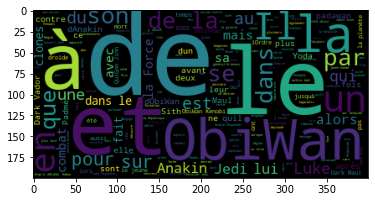

In [64]:
import matplotlib.pyplot as plt
import wordcloud

# Instanciate WordCloud 
wd = wordcloud.WordCloud()
cloud = wd.generate(doc.text)

# Show word cloud with matplotlib 
plt.imshow(cloud)

# Remove trailing logs 
plt.show()

* Now import the stop-words present in `spacy`

In [65]:
from spacy.lang.fr.stop_words import STOP_WORDS

In [66]:
sorted(list(STOP_WORDS))[:10]

['a', 'abord', 'afin', 'ah', 'ai', 'aie', 'ainsi', 'ait', 'allaient', 'allons']

* Make a word cloud again without the stop words

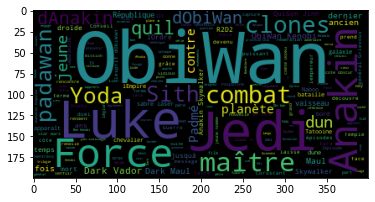

In [67]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)

# Generate word cloud 
cloud = wd.generate(doc.text)

# Show with matplotlib 
plt.imshow(cloud)

# Remove trailing log 
plt.show()

* We would need to have a corpus of lemmatized words, recreate a corpus of lemmatized words and visualize your new word cloud

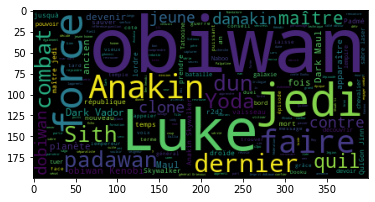

In [75]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS)

lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]

# Generate word cloud 
cloud = wd.generate(" ".join(lemma))

# Show with matplotlib 
plt.imshow(cloud)

# Remove trailing log 
plt.show()

* Let's push analysis further! Some words are really common in our corpus, find which of them

In [76]:
import pandas as pd

df_lemma = pd.Series(lemma)
common = df_lemma.value_counts() > 22
common = common[common]

* Update your list of stop words with the common words

In [79]:
# Create a union of sets 
STOP_WORDS_updated = STOP_WORDS.union(list(common.index) + ["faire", "fois"])

* Create a new word cloud 

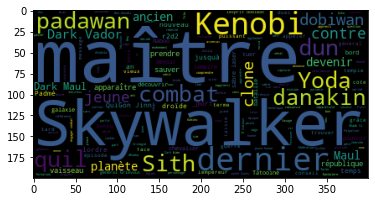

In [118]:
wd = wordcloud.WordCloud(stopwords=STOP_WORDS_updated)

lemma_updated = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS_updated]

# Generate word cloud 
cloud = wd.generate(" ".join(lemma_updated))

# Show with matplotlib 
plt.imshow(cloud)

# Remove trailing log 
plt.show()

* We will now start building a tf-idf matrix. Let's first create a DataFrame containing our lemmatized corpus without the updated stop words.

In [119]:
df_lemma = pd.DataFrame([" ".join(lemma_updated)], columns=["document"])
df_lemma

,document
0,disposer douvrage darticle référence connaître...


* Let's create now a TF-IDF matrix using `sklearn`

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_lemma["document"])

# X is a generator. We can transform that as an array
dense = X.toarray()
dense

array([[0.01058572, 0.01058572, 0.01058572, ..., 0.01058572, 0.03175715,
        0.01058572]])

* Visualize most important words using `seaborn`, `matplotlib` or `plotly`

> Help: You can create a dataframe, transpose it and then easily create a visualization

In [121]:
df_vect = pd.DataFrame(dense, columns=[x for x in vectorizer.get_feature_names()])
df_vect

,19,200,2004,2014,2016,25,26,30,39,44,...,élément,émerger,épaule,épique,épisode,équipe,étouffe,étudier,évènement,événement
0,0.010586,0.010586,0.010586,0.010586,0.010586,0.010586,0.010586,0.010586,0.010586,0.010586,...,0.010586,0.010586,0.010586,0.031757,0.052929,0.010586,0.010586,0.010586,0.031757,0.010586


In [122]:
df_vect.transpose().sort_values(by=0, ascending=False)

,0
dark,0.232886
maul,0.190543
maître,0.190543
dobiwan,0.169371
kenobi,0.158786
...,...
incontestablement,0.010586
indication,0.010586
infiltrer,0.010586
informé,0.010586
